<a href="https://colab.research.google.com/github/Harshalkumar96/Retail_Sales_Prediction_Capstone_Project/blob/main/Retail_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


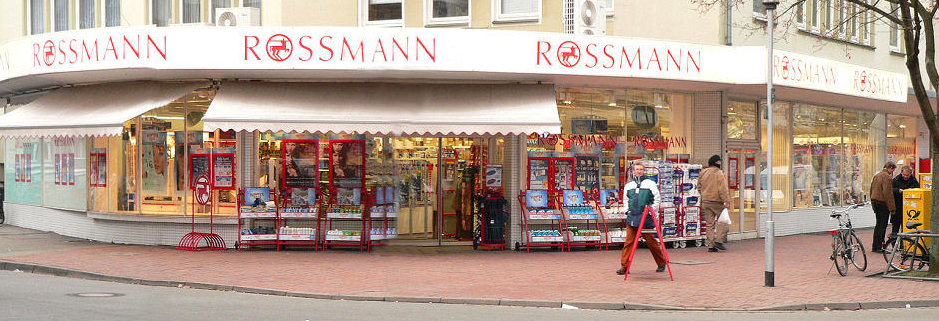

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import missingno as msno

# This is for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
df_rossmann = pd.read_csv('/content/drive/MyDrive/Capstone Projects csv/Rossmann Stores Data.csv')
df_store = pd.read_csv('/content/drive/MyDrive/Capstone Projects csv/store.csv')

### Dataset First View

In [ ]:
# Dataset First Look --> for Rossmann DataSet

df_rossmann.head()

In [ ]:
# Dataset First Look --> for Rossmann DataSet

df_store.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('In Rossmann DataSet their are -->' ,'\033[1m', df_rossmann.shape[0] ,'\033[0m', " Rows & ",'\033[1m', df_rossmann.shape[1],'\033[0m', " Columns")
print('In DataSet their are -->' ,'\033[1m', df_store.shape[0] ,'\033[0m', " Rows & ",'\033[1m', df_store.shape[1],'\033[0m', " Columns")

### Dataset Information

In [ ]:
# Dataset Info --> for Rossman DataSet
df_rossmann.info()

In [ ]:
# Dataset Info --> for Store DataSet
df_store.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print('Duplicate values in Rossmann Dataset are ','\033[1m', df_rossmann.duplicated().sum() ,'\033[0m',)
print('Duplicate values in Store Dataset are ','\033[1m', df_store.duplicated().sum() ,'\033[0m',)

We've Not found any duplicate values in both DataSet's

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count for Rossmann Dataset
df_rossmann.isna().sum()

In [ ]:
# Missing Values/Null Values Count for Rossmann Dataset
df_store.isna().sum()

we didn't found any Null value in Rossmann Dataset 
We've found some Null Values in Store Dataset in the columns as --> CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval


In [ ]:
# calculation of percentage of missing values in Store dataset 
df_rossmann.isnull().mean()*100

In [ ]:
# calculation of percentage of missing values in Store dataset 
df_store.isnull().mean()*100

In [ ]:
# Visualizing the missing values - for Rossman Dataset

msno.matrix(df_rossmann,figsize=(10,5))

As we've seen earlier also we didn't found any Null value in Rossman Dataset so we can't see any missing data in visualization also

In [ ]:
# Visualizing the missing values - for Store Dataset

msno.matrix(df_store,figsize=(10,5))

we've seen missing values in 6 columns of Store dataset and so we can see the same thing in visualization also

### What did you know about your dataset?

Till now we get to know the following points about our dataset:
1. 'Rossmann dataset' is having 1017209 rows and 9 columns and does not have any null value.
2. 'Stores dataset' is having 1115 rows and 10 columns. It contains null values in total six features viz. CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear and PromoInterval. 
3. There are no duplicate values present in both the datasets.
4. There are total 4 categorical features in 'Rossmann' dataset namely Open, Promo, StateHoliday and SchoolHoliday and 'Stores' contain categorical features namely StoreType, Assortment, Promo2, PromoInterval.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Rossmann Dataset Columns -->", df_rossmann.columns.tolist())
print("Rossmann Dataset Columns -->", df_store.columns.tolist())

In [ ]:
# Rossmann Dataset Describe
df_rossmann.describe()

In [ ]:
# Store Dataset Describe
df_store.describe()

### Variables Description 

**Store** = Unique ID for each store

**Day_of_Week** = day of week (1 = Monday, ..... , 7 = Sunday)

**Date** = date of each sales entry

**Sales** = The Turnover for any perticular day

**Customers** = Number of customers on given day

**Open** = Status that shope were open or not (0 = closed, 1 = open)

**Promo** = Indicates whether a store is running promo on that day

**State_Holiday** = Indicated State Holidays

**School_Holiday** = Indicated if the store was affected by closure of public school: 1 = affected , 0 = Not-affected

**Store_Type** = Differentiate between 4 store models: a, b, c, d

**Assortment** = Describes an assortment level: a = basic, b = extra, c = extended

**Competition_Distance** = Distance in meters to the nearest competitiore store

**Competition_open_since_month** = Gives the approximate month of the time the nearest competitor was opened

**Competition_open_since_year** = Gives the approximate year of the time the nearest competitor was opened

**promo2** = Describes the calender week when the store started participating in promo2 

**Promo2_since_year** = Describes the year when the store started participating in promo2

**Promo_interval** = Describes the consicutive intervals promo2 is started, naming the months the promotion is started naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable. --> for Rossnamm Dataset

df_rossmann.nunique()

In [ ]:
# Check Unique Values for each variable. --> for Store Dataset
df_store.nunique()

We can observe in above both Dataset's which one are categorical values columns

## 3. ***Data Wrangling***

### 1. Null Values Treatment

a). Handling Null values from CompetitionDistance feature

In [ ]:
# featching the observations which contains null values in competitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()]

In [ ]:
# plotting box plot to check the outliers in CompetitionDistance 
plt.figure(figsize=(10,4))
sns.boxplot(x= df_store["CompetitionDistance"])

In order to fill the null values of CompetitionDistance we have 4 options:
1. Zero(0) => Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.
2. Mean => Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. Median => To get good results replacing with median can be a better choice.
4. Mode => Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the median.

In [ ]:
# filling null values 
df_store["CompetitionDistance"].fillna(df_store["CompetitionDistance"].median(), inplace = True)

In [ ]:
# rechecking if we have any further null values in CompetitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()].sum()

In [ ]:
# rechecking if we have any null values
df_store.info()

##### b). Handling null values from **CompetitionOpenSinceMonth and CompetitionOpenSinceYear** feature.

In [ ]:
# fetching the observations which contains null values in CompetitionOpenSinceMonth feature
df_store[df_store["CompetitionOpenSinceMonth"].isnull()]

In [ ]:
# fetching the observations which contains null values in CompetitionOpenSinceYear feature
df_store[df_store["CompetitionOpenSinceYear"].isnull()]

In [ ]:
# plotting box plot to check the outliers in CompetitionOpenSinceMonth features
plt.figure(figsize=(10,4))
sns.boxplot(df_store["CompetitionOpenSinceMonth"])

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceYear features
plt.figure(figsize=(10,4))
sns.boxplot(df_store["CompetitionOpenSinceYear"])

Filling null values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear with Mode.

In [ ]:
# filling null values of CompetitionOpenSinceMonth 
df_store["CompetitionOpenSinceMonth"].fillna(df_store["CompetitionOpenSinceMonth"].mode()[0], inplace = True)

In [ ]:
# filling null values of CompetitionOpenSinceYear
df_store["CompetitionOpenSinceYear"].fillna(df_store["CompetitionOpenSinceYear"].mode()[0], inplace = True)

In [ ]:
# rechecking if we have any null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
df_store.info()

##### c). Handling null values from **Promo2SinceWeek, Promo2SinceYear and PromoInterval** feature.

Since corresponding value where Promo2 is 0 for features Promo2SinceWeek, Promo2SinceYear and PromoInterval having null values. So, we are replacing null values with 0.

In [ ]:
# Replaceing all null values of Promo2SinceWeek, Promo2SinceYear, and PromoInterval with 0
df_store["Promo2SinceWeek"].fillna(0, inplace=True)
df_store["Promo2SinceYear"].fillna(0, inplace=True)
df_store["PromoInterval"].fillna(0, inplace=True)

In [ ]:
# rechecking if our features contains more null values
df_store.info()

So in such way we've now cleaned up all the Null/Missing Values from both Datasets

### 2. Merging Dataset

In [ ]:
# check with left join 

df_left = pd.merge(df_rossmann , df_store, how = "left", on = "Store" )
print(df_left.shape)
print("Total Null Values present in Left Merged Dataset are = ", df_left.isna().sum().sum())

In [ ]:
# check with Right join 

df_right = pd.merge(df_rossmann , df_store, how = "right", on = "Store" )
print(df_right.shape)
print("Total Null Values present in Right Merged Dataset are = ", df_right.isna().sum().sum())

In [ ]:
# check with Inner join 

df_inner = pd.merge(df_rossmann , df_store, how = "inner", on = "Store" )
print(df_inner.shape)
print("Total Null Values present in Inner Merged Dataset are = ", df_inner.isna().sum().sum())

In [ ]:
# check with Outer join 

df_outer = pd.merge(df_rossmann , df_store, how = "outer", on = "Store" )
print(df_outer.shape)
print("Total Null Values present in Outer Merged Dataset are = ", df_outer.isna().sum().sum())

Since as per our Observation from above we can say that we are obatining same shape and 0 Null Values from all the joins, Therefore we can use any of the above join for further analysis, our end results will be same 

Hance we're using left join for further analysis

In [ ]:
# Using left join for further analysis
df = pd.merge(df_rossmann , df_store, how = "left", on = "Store" )


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()


### 3. Typecasting

In [ ]:
# checking datatypes of columns in final dataframe
df.info()

In [ ]:
# Now let's change the datatype of perticular columns into required format 
df["Date"] = pd.to_datetime(df["Date"], format = "%Y/%m/%d")
df["CompetitionDistance"] = df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"] = df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"] = df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int) 

In [ ]:
# now verify the datatypes
df.info()

### What all manipulations have you done and insights you found?

Answer Here.

In [ ]:
df.head()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### 1. Univariate Analysis

#### Chart - 1

In [ ]:
# checking Distributions of Continuous features
plt.figure(figsize = (20,10))

# Sales vs Frequency plot
plt.subplot(2,2,1) 
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(df["Sales"], shade=True)
plt.title("Density distribution of Sales", size=15)


# CompetitionDistance vs Frequency
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(df["CompetitionDistance"], shade=True)
plt.title("Density Distribution of CompetitionDistance", size=15)


# Cutomer vs Frequency
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(df["Customers"], color="Red", shade = True)
plt.title('Density distribution of Customers',size = 15)

##### 1. Why did you pick the specific chart?

We picked this chart as it shows whether the observations are high or low and also whether they are concentrated in one area or spread out across the entire scale.

##### 2. What is/are the insight(s) found from the chart?

1. Avarage Sales value is approx 1000 and grapg is rightly skewed.

2. We can clearly observe that most of the stores have their competition within 
   5Km range which indicates mostly competiting stores are located nearby to   each other.

3. Avarage number of customer visiting stores is 1000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We plotted frequency distribution graph for sales, customer and competition distance with the help of which we came to know that many competiting stores are densly located. so, business should plan different strategies to sustain in the competitive market.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***